In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
df = pd.read_csv('nice.csv')

In [3]:
df.head()

,Deployment,STA,Ap,RSSI,TXOP,Target
0,9391,7,7,-63.71,1,108
1,9391,2,2,-67.19,1,0
2,9391,1,1,-64.87,1,30
3,9391,5,5,-66.72,1,54
4,9391,6,6,-65.12,2,156


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749596 entries, 0 to 1749595
Data columns (total 6 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Deployment  int64  
 1   STA         int64  
 2   Ap          int64  
 3   RSSI        float64
 4   TXOP        int64  
 5   Target      int64  
dtypes: float64(1), int64(5)
memory usage: 80.1 MB


In [5]:
df.describe()

,Deployment,STA,Ap,RSSI,TXOP,Target
count,1.749596e+06,1.749596e+06,1.749596e+06,1749596.00,1.749596e+06,1.749596e+06
mean,5.027274e+03,1.396399e+01,5.000423e+00,inf,5.050169e+01,1.180081e+02
std,2.893117e+03,1.071264e+01,2.581193e+00,NaN,2.886510e+01,1.010131e+02
min,1.000000e+00,1.000000e+00,1.000000e+00,-70.63,1.000000e+00,0.000000e+00
25%,2.537000e+03,5.000000e+00,3.000000e+00,-66.55,2.600000e+01,5.400000e+01
50%,5.040000e+03,1.100000e+01,5.000000e+00,-64.87,5.100000e+01,7.800000e+01
75%,7.531000e+03,2.100000e+01,7.000000e+00,-62.11,7.600000e+01,1.560000e+02
max,1.000000e+04,4.500000e+01,9.000000e+00,inf,1.000000e+02,4.320000e+02


In [6]:
df.isna().sum()

Deployment    0
STA           0
Ap            0
RSSI          0
TXOP          0
Target        0
dtype: int64

In [7]:
df.nunique()

Deployment    7000
STA             45
Ap               9
RSSI            20
TXOP           100
Target          13
dtype: int64

In [8]:
df['RSSI'].value_counts()

-66.55    174066
-65.58    141856
-62.57    139987
-64.87    139641
-63.71    139513
-59.56    139078
-67.19     71107
-58.59     70940
-55.58     70911
-64.61     70600
-67.88     70591
-69.12     70081
-66.72     70037
-65.12     69994
-61.60     69600
-67.62     69026
-62.11     69008
-52.57     68324
-70.63     17763
 inf       17473
Name: RSSI, dtype: int64

In [9]:
df['RSSI'].min(), df['RSSI'].argmax()

(-70.63, 753)

In [10]:
df['RSSI'].max()

inf

In [11]:
df[df.RSSI==df['RSSI'].max()]['Target']

753        432
766        432
786        432
821        432
851        432
          ... 
1748245    432
1748270    432
1748317    432
1748343    432
1748370    432
Name: Target, Length: 17473, dtype: int64

In [12]:
df.RSSI = df.RSSI.replace({df['RSSI'].max(): -1})

In [13]:
df['STA'].describe()

count    1.749596e+06
mean     1.396399e+01
std      1.071264e+01
min      1.000000e+00
25%      5.000000e+00
50%      1.100000e+01
75%      2.100000e+01
max      4.500000e+01
Name: STA, dtype: float64

In [14]:
df['Target'].describe()

count    1.749596e+06
mean     1.180081e+02
std      1.010131e+02
min      0.000000e+00
25%      5.400000e+01
50%      7.800000e+01
75%      1.560000e+02
max      4.320000e+02
Name: Target, dtype: float64

In [15]:
df['Target'].skew()

1.2104242177666074

# BaseLine Model

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
log = LogisticRegression()

In [21]:
X = df.drop('Target',axis=1)

In [22]:
y = df['Target']

In [23]:
X_train ,X_test, y_train, y_test = train_test_split(X,y,random_state=23)

In [24]:
log.fit(X_train,y_train)

C:\Users\ali\miniconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
mean_squared_error(y_train,log.predict(X_train)) ,mean_squared_error(y_test,log.predict(X_test))

(10889.579354319512, 10859.263427671302)

In [26]:
log.score(X_test,y_test)

0.2186333302088025

In [27]:
X_test

,Deployment,STA,Ap,RSSI,TXOP
1728649,3958,2,2,-65.12,57
364412,5987,2,1,-52.57,75
288374,7951,4,1,-69.12,86
111630,9583,9,9,-69.12,52
1351768,2324,4,1,-59.56,76
...,...,...,...,...,...
18589,9363,1,1,-65.12,57
177269,9788,7,7,-67.19,68
1118651,4545,14,7,-61.60,22
1409485,2743,1,1,-59.56,61


In [28]:
test= pd.read_csv('nicetest.csv')

In [29]:
test.RSSI = test.RSSI.replace({test['RSSI'].max(): -1})

In [30]:
pred = log.predict(test)

In [31]:
# Deployment10000_TXOP100_AP3_STA9

df['ID']='Deployment'+df['Deployment'].astype(str)+'_'+'TXOP'+df['TXOP'].astype(str)+'_'+'AP'+df['Ap'].astype(str)+'_'+'STA'+df['STA'].astype(str)

In [32]:
test['ID']='Deployment'+test['Deployment'].astype(str)+'_'+'TXOP'+test['TXOP'].astype(str)+'_'+'AP'+test['Ap'].astype(str)+'_'+'STA'+test['STA'].astype(str)

In [33]:
submit  = pd.DataFrame(test['ID'])

In [34]:
submit['Target'] = pred

In [35]:
submit.head()

,ID,Target
0,Deployment9373_TXOP1_AP9_STA35,78
1,Deployment9373_TXOP2_AP4_STA13,78
2,Deployment9373_TXOP2_AP1_STA3,78
3,Deployment9373_TXOP2_AP3_STA9,78
4,Deployment9373_TXOP3_AP4_STA14,78


In [36]:
# submit.to_csv('1sub.csv',index=False)

In [37]:
# lets try  Hyper Parameter Model

# LightGDM

In [42]:
import lightgbm as ltb

## 3- K-Nearest Neighbors

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
neigh = KNeighborsClassifier()

In [45]:
# neigh.fit(X_train, y_train)

In [46]:
# mean_squared_error(y_train,neigh.predict(X_train)) ,mean_squared_error(y_test,neigh.predict(X_test))

# EDA

In [47]:
df = pd.read_csv('nice.csv')

In [48]:
df.nunique()

Deployment    7000
STA             45
Ap               9
RSSI            20
TXOP           100
Target          13
dtype: int64

# Target

In [49]:
df['Target'].min() , df['Target'].max()  ,df['Target'].mean() ,df['Target'].median() 

(0, 432, 118.00812644747701, 78.0)

<AxesSubplot:xlabel='Target', ylabel='count'>

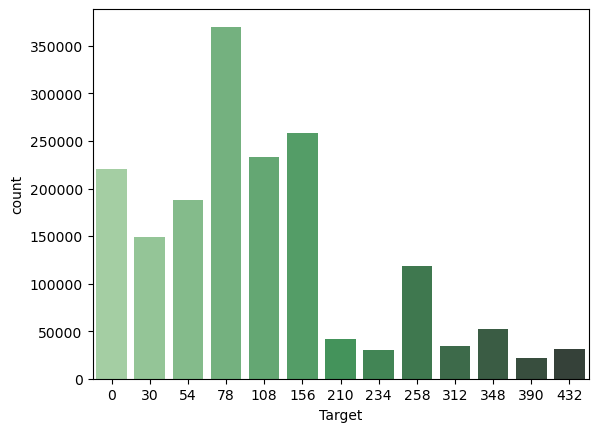

In [50]:
sns.countplot(x="Target" ,#, Show count of observations
data=df,
palette="Greens_d")

In [51]:
df['Target'].apply(np.log10)

0          2.033424
1              -inf
2          1.477121
3          1.732394
4          2.193125
             ...   
1749591    2.494155
1749592        -inf
1749593    2.193125
1749594    1.477121
1749595        -inf
Name: Target, Length: 1749596, dtype: float64

In [52]:
np.isinf(df).sum()

Deployment        0
STA               0
Ap                0
RSSI          17473
TXOP              0
Target            0
dtype: int64

In [56]:
# np.isinf(test).sum()


#### 1- ifinit value
### 2- imputation
## 3- outlier
# 4- hyperparameter

but first must ...

In [57]:
inf = df['RSSI'].max()

In [58]:
df[df.RSSI==inf].nunique()

Deployment    1638
STA             45
Ap               9
RSSI             1
TXOP           100
Target           1
dtype: int64

In [59]:
df[df.RSSI==inf]['STA'].describe()

count    17473.000000
mean        13.909804
std         10.613727
min          1.000000
25%          6.000000
50%         11.000000
75%         20.000000
max         45.000000
Name: STA, dtype: float64

In [60]:
df[df.RSSI==inf]['Target'].describe()

count    17473.0
mean       432.0
std          0.0
min        432.0
25%        432.0
50%        432.0
75%        432.0
max        432.0
Name: Target, dtype: float64

In [61]:
(df['Target'].unique())

array([108,   0,  30,  54, 156,  78, 258, 234, 210, 312, 348, 432, 390],
      dtype=int64)

In [62]:
df[df['Target']==0]['RSSI'].min

<bound method NDFrame._add_numeric_operations.<locals>.min of 1         -67.19
17        -66.72
22        -66.55
26        -67.19
30        -67.19
           ...  
1749573   -64.87
1749575   -66.55
1749579   -67.62
1749592   -64.87
1749595   -67.62
Name: RSSI, Length: 220912, dtype: float64>

In [63]:
df[df['Target']==432]['RSSI']

208       -55.58
231       -55.58
257       -52.57
264       -55.58
283       -52.57
           ...  
1749048   -55.58
1749103   -52.57
1749104   -52.57
1749520   -52.57
1749582   -52.57
Name: RSSI, Length: 31652, dtype: float64

In [64]:
df[df['Target']==432]['RSSI'].min() , df[df['Target']==432]['RSSI'].max()

(-55.58, inf)

In [65]:
df[df['Target']==390]['RSSI'].min() , df[df['Target']==390]['RSSI'].max()

(-59.56, -52.57)

In [66]:
df[df['Target']==348]['RSSI'].min() , df[df['Target']==348]['RSSI'].max()

(-63.71, -52.57)

In [67]:
df[df['Target']==312]['RSSI'].min() , df[df['Target']==312]['RSSI'].max()

(-65.12, -52.57)

In [68]:
df[df['Target']==258]['RSSI'].min() , df[df['Target']==258]['RSSI'].max()

(-69.12, -52.57)

In [69]:
df[df['Target']==234]['RSSI'].min() , df[df['Target']==234]['RSSI'].max()

(-70.63, -52.57)

In [70]:
df[df['Target']==210]['RSSI'].min() , df[df['Target']==210]['RSSI'].max()

(-67.88, -52.57)

In [71]:
df[df['Target']==156]['RSSI'].min() , df[df['Target']==156]['RSSI'].max()

(-70.63, -52.57)

In [72]:
df[df['Target']==108]['RSSI'].min() , df[df['Target']==108]['RSSI'].max()

(-70.63, -52.57)

In [73]:
df[df['Target']==78]['RSSI'].min() , df[df['Target']==78]['RSSI'].max()

(-70.63, -55.58)

In [74]:
df[df['Target']==54]['RSSI'].min() , df[df['Target']==54]['RSSI'].max()

(-70.63, -58.59)

In [75]:
df[df['Target']==30]['RSSI'].min() , df[df['Target']==30]['RSSI'].max()

(-70.63, -61.6)

In [76]:
df[df['Target']==0]['RSSI'].min() , df[df['Target']==0]['RSSI'].max()

(-70.63, -63.71)

In [77]:
df.RSSI = df.RSSI.replace({df['RSSI'].max(): -52.57})

In [78]:
sns.set()

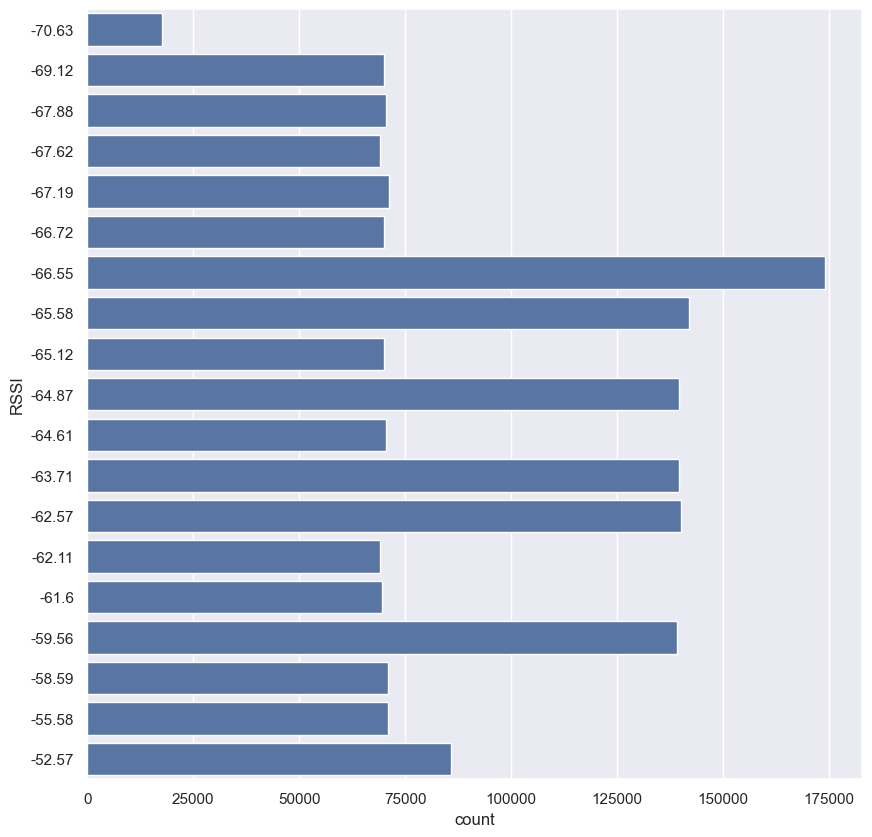

In [79]:
fig, axis = plt.subplots(figsize=(10,10))
sns.countplot(y = 'RSSI', 
data=df,
color="b");

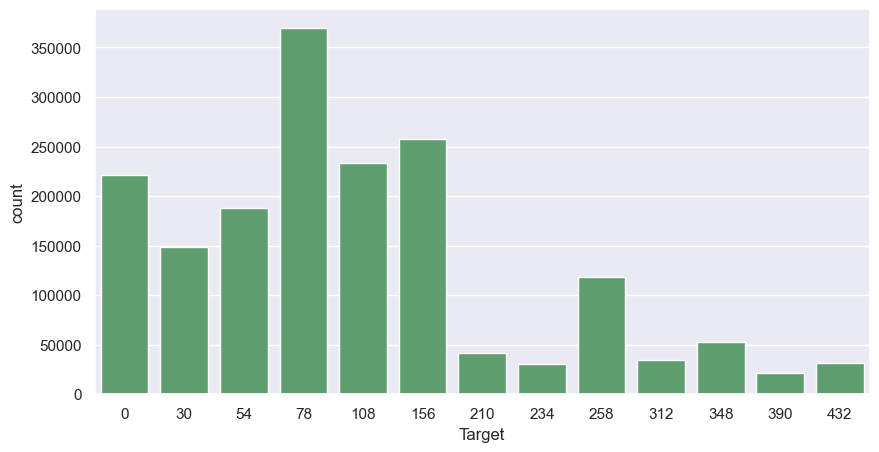

In [80]:
fig, axis = plt.subplots(figsize=(10,5))
sns.countplot(x = 'Target', 
data=df,
color="g");

In [81]:
df['Target'].mean() , df['Target'].median()

(118.00812644747701, 78.0)

In [82]:
df['Target'].skew()

1.2104242177666074

In [83]:
df.skew().sort_values(ascending=False)

Target        1.210424
RSSI          1.063678
STA           0.893935
TXOP          0.000187
Ap           -0.000781
Deployment   -0.016790
dtype: float64

In [84]:
np.log(df['Target']).skew()

C:\Users\ali\miniconda3\envs\tf\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


nan

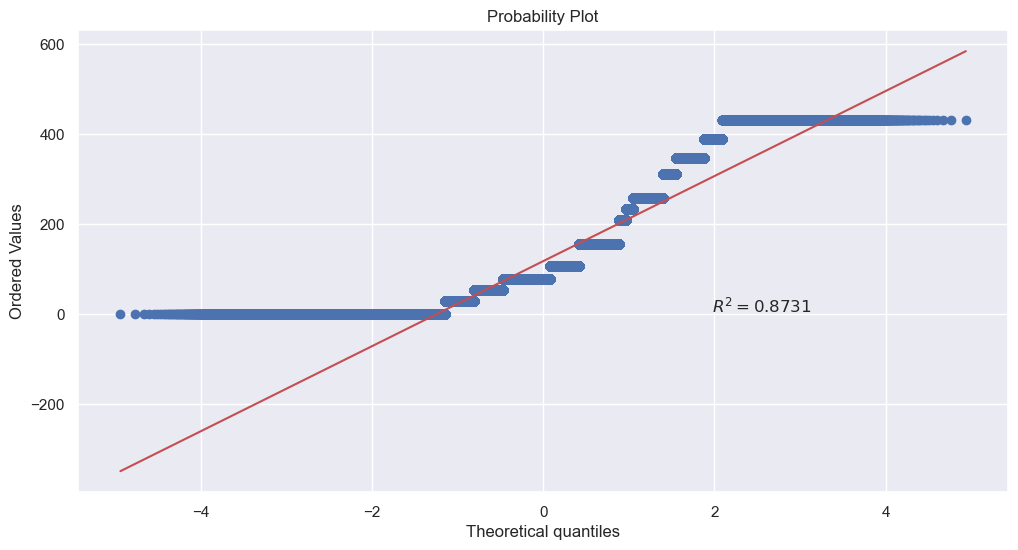

In [85]:
fig, ax = plt.subplots(figsize=(12,6))
res = stats.probplot(df['Target'],  plot=ax,rvalue=True)

In [86]:
df['Target'].nunique()

13

# it is Classification Problem!?

In [87]:
from sklearn.ensemble import RandomForestRegressor

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
from sklearn.neighbors import KNeighborsClassifier

In [90]:
neigh = KNeighborsClassifier()

In [91]:
# neigh.fit(X_train, y_train)

In [92]:
# mean_squared_error(y_train,neigh.predict(X_train)) ,mean_squared_error(y_test,neigh.predict(X_test))

In [93]:
# neigh.score(X_test,y_test)

In [94]:
X = df.drop(['Target','Deployment','Ap'],axis=1)
y = df['Target']
X_train, X_test, y_trai,y_test = train_test_split(X,y,random_state=42)

In [95]:
# neigh.fit(X_train, y_train)

In [96]:
# neigh.score(X_test,y_test)

In [97]:
# rfc = RandomForestClassifier(max_depth=2, random_state=42)
# rfc.fit(X_train, y_train)
# rfc.score(X_test,y_test)

In [98]:
test= pd.read_csv('nicetest.csv')

In [99]:
test.RSSI = test.RSSI.replace({test['RSSI'].max(): -52.57})

In [100]:
td = test.drop(['Deployment','Ap'],axis=1)

In [103]:
submit['Target'] =pred

In [104]:
# submit.to_csv('sub2.csv',index=False)

In [105]:
df

,Deployment,STA,Ap,RSSI,TXOP,Target
0,9391,7,7,-63.71,1,108
1,9391,2,2,-67.19,1,0
2,9391,1,1,-64.87,1,30
3,9391,5,5,-66.72,1,54
4,9391,6,6,-65.12,2,156
...,...,...,...,...,...,...
1749591,3934,2,1,-65.12,99,312
1749592,3934,9,5,-64.87,100,0
1749593,3934,3,2,-52.57,100,156
1749594,3934,7,4,-66.72,100,30


In [106]:
test

,Deployment,STA,Ap,RSSI,TXOP
0,9373,35,9,-69.12,1
1,9373,13,4,-64.87,2
2,9373,3,1,-67.19,2
3,9373,9,3,-63.71,2
4,9373,14,4,-65.58,3
...,...,...,...,...,...
749919,5144,5,3,-63.71,98
749920,5144,17,9,-65.58,99
749921,5144,5,3,-63.71,99
749922,5144,7,4,-69.12,100


In [107]:
df.head()

,Deployment,STA,Ap,RSSI,TXOP,Target
0,9391,7,7,-63.71,1,108
1,9391,2,2,-67.19,1,0
2,9391,1,1,-64.87,1,30
3,9391,5,5,-66.72,1,54
4,9391,6,6,-65.12,2,156


In [108]:
df[(df['STA']==7) &(df['Ap']==7)&(df['RSSI']==-63.71)]

,Deployment,STA,Ap,RSSI,TXOP,Target
0,9391,7,7,-63.71,1,108
13,9391,7,7,-63.71,6,234
14,9391,7,7,-63.71,7,78
18,9391,7,7,-63.71,8,156
29,9391,7,7,-63.71,12,108
...,...,...,...,...,...,...
1743883,5150,7,7,-63.71,67,108
1743893,5150,7,7,-63.71,70,156
1743929,5150,7,7,-63.71,85,210
1743935,5150,7,7,-63.71,88,210


In [109]:
df[(df['STA']==7) &(df['Ap']==7)&(df['RSSI']==63.71)& df['TXOP']==1]

,Deployment,STA,Ap,RSSI,TXOP,Target


In [111]:
df['Target'].nunique()

13

In [112]:
df['Deployment'].value_counts()

7791    287
9846    286
6571    286
157     285
1442    284
       ... 
5693    215
4357    215
5780    214
7721    214
8692    211
Name: Deployment, Length: 7000, dtype: int64

In [113]:
df.groupby(['Deployment']).max()

,STA,Ap,RSSI,TXOP,Target
Deployment,,,,,
1,18,9,-52.57,100,432
3,18,9,-52.57,100,432
4,18,9,-52.57,100,432
7,45,9,-52.57,100,432
8,45,9,-52.57,100,390
...,...,...,...,...,...
9994,36,9,-52.57,100,432
9995,27,9,-55.58,100,432
9997,9,9,-58.59,100,390


In [114]:
asdf = df.groupby(['Deployment']).max()

In [115]:
asdf['STA']

Deployment
1        18
3        18
4        18
7        45
8        45
         ..
9994     36
9995     27
9997      9
9998     45
10000    36
Name: STA, Length: 7000, dtype: int64

In [116]:
mp = asdf['STA'].to_dict()

In [117]:
mp[8]

45

In [118]:
daf = np.array(df['Deployment'])
daf

array([9391, 9391, 9391, ..., 3934, 3934, 3934], dtype=int64)

In [119]:
# [n for n in daf]

In [177]:
# [mp[n] for n in daf]

In [121]:
df[df['Deployment']==3612].groupby(['Deployment']).nunique()

,STA,Ap,RSSI,TXOP,Target
Deployment,,,,,
3612,45,9,16,100,13


In [122]:
df[df['Deployment']==1953]['STA'].nunique()

27

In [123]:
df[df['Deployment']==9391].groupby(['Deployment'])['STA'].value_counts()

Deployment  STA
9391        5      35
            2      30
            7      30
            9      30
            1      28
            4      26
            6      25
            8      23
            3      18
Name: STA, dtype: int64

In [124]:
35 + 30 +30+30+28+26+25+23+18

245

In [125]:
len(df[df['Deployment']==9391])

245

In [126]:
lsm = df.groupby(['Deployment']).max()

In [127]:
lsm['STA']

Deployment
1        18
3        18
4        18
7        45
8        45
         ..
9994     36
9995     27
9997      9
9998     45
10000    36
Name: STA, Length: 7000, dtype: int64

In [128]:
msl = lsm['STA'].to_dict()

In [129]:
dep = np.array(df['Deployment'])

In [130]:
# 1- Last Station Max()
lstm = [msl[n] for n in dep]

In [131]:
usn = df.groupby(['Deployment']).nunique()

In [132]:
(usn['STA'] == lsm['STA']).sum()

6771

In [133]:
nsu = usn['STA'].to_dict()

In [134]:
# 2- number of activae STA per AP
uns = [nsu[n] for n in dep]

In [135]:
df.groupby(['Deployment'])['STA'].value_counts()

Deployment  STA
1           10     18
            11     17
            2      16
            5      16
            8      15
                   ..
10000       8       4
            16      4
            23      4
            7       3
            34      3
Name: STA, Length: 188147, dtype: int64

In [136]:
ioqa = df.groupby(['Deployment'])['STA'].value_counts()

In [176]:
# ioqa.to_dict()

In [175]:
# (ioqa.to_dict()).values()

In [ ]:
df[(df['STA']==7) &(df['Ap']==7)&(df['RSSI']==63.71)& (df['TXOP']==1) & (df['stavlq']==30)]['Target'].nunique()

In [139]:
ioqa[(4,1)]

15

In [140]:
# [ioqa[(n,1)] for n in dep]

In [141]:
dep = np.array(df['Deployment'])

In [142]:
ped = np.array(df[['Deployment','STA']])
ped

array([[9391,    7],
       [9391,    2],
       [9391,    1],
       ...,
       [3934,    3],
       [3934,    7],
       [3934,   15]], dtype=int64)

In [143]:
# 3 how many this staion used for each deployment
aqoi = [ioqa[(n,m)] for n,m in ped]

In [144]:

df['stamax'] = lstm
df['staunique'] = uns
df['stavlq'] = aqoi

In [145]:
df.head()

,Deployment,STA,Ap,RSSI,TXOP,Target,stamax,staunique,stavlq
0,9391,7,7,-63.71,1,108,9,9,30
1,9391,2,2,-67.19,1,0,9,9,30
2,9391,1,1,-64.87,1,30,9,9,28
3,9391,5,5,-66.72,1,54,9,9,35
4,9391,6,6,-65.12,2,156,9,9,25


In [146]:
df['RSSI'] = df['RSSI']*-1

In [147]:
X = df.drop(['Target','Deployment','TXOP','Ap','stamax'],axis=1)[:10000]
y = df['Target'][:10000]
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state=42)

In [148]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score(X_test,y_test)

0.276

In [149]:
rfc = RandomForestRegressor()
rfc.fit(X_train, y_train)
rfc.score(X_test,y_test)

0.13133810597622997

In [150]:
model = ltb.LGBMClassifier()

In [151]:
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.2848

In [152]:
mean_absolute_error(y_train,model.predict(X_train)) ,mean_absolute_error(y_test,model.predict(X_test))

(59.9664, 76.416)

In [153]:
df[(df['STA']==1) & (df['Ap']==1)]

,Deployment,STA,Ap,RSSI,TXOP,Target,stamax,staunique,stavlq
2,9391,1,1,64.87,1,30,9,9,28
6,9391,1,1,64.87,2,54,9,9,28
20,9391,1,1,64.87,8,54,9,9,28
27,9391,1,1,64.87,11,30,9,9,28
42,9391,1,1,64.87,16,54,9,9,28
...,...,...,...,...,...,...,...,...,...
1749502,3934,1,1,63.71,60,30,18,18,18
1749507,3934,1,1,63.71,62,234,18,18,18
1749517,3934,1,1,63.71,66,0,18,18,18
1749527,3934,1,1,63.71,70,30,18,18,18


In [154]:
df.nunique()

Deployment    7000
STA             45
Ap               9
RSSI            19
TXOP           100
Target          13
stamax           8
staunique       10
stavlq          45
dtype: int64

In [155]:
test['RSSI'] = test['RSSI']*-1

In [156]:
dept = np.array(test['Deployment'])

In [157]:
lsmt = test.groupby(['Deployment']).max()

In [158]:
mslt = lsmt['STA'].to_dict()

In [159]:
# 1- Last Station Max()
lstmt = [mslt[n] for n in dept]

In [160]:
usnt = test.groupby(['Deployment']).nunique()

In [161]:
nsut = usnt['STA'].to_dict()

In [162]:
# 2- number of activae STA per AP
unst = [nsut[n] for n in dept]

In [163]:
ioqat = test.groupby(['Deployment'])['STA'].value_counts()

In [164]:
pedt = np.array(test[['Deployment','STA']])
pedt

array([[9373,   35],
       [9373,   13],
       [9373,    3],
       ...,
       [5144,    5],
       [5144,    7],
       [5144,   16]], dtype=int64)

In [165]:
# 3 how many this staion used for each deployment
aqoit = [ioqat[(n,m)] for n,m in pedt]

In [166]:
test['stamax'] = lstmt
test['staunique'] = unst
test['stavlq'] = aqoit

In [172]:
pred3 = rfc.predict(test.drop(['Deployment','TXOP','Ap','stamax'],axis=1))

In [173]:
pred4 = model.predict(test.drop(['Deployment','TXOP','Ap','stamax'],axis=1))

In [184]:
(pred3 !=pred4).sum()

748858

In [169]:
submit['Target'] = pred4

In [170]:
submit.head()

,ID,Target
0,Deployment9373_TXOP1_AP9_STA35,258
1,Deployment9373_TXOP2_AP4_STA13,108
2,Deployment9373_TXOP2_AP1_STA3,78
3,Deployment9373_TXOP2_AP3_STA9,108
4,Deployment9373_TXOP3_AP4_STA14,30


In [ ]:
# submit.to_csv('sub3.csv',index=False)

In [196]:
df = df[df['Target']!=0]

In [221]:
X = df.drop(['Target','Deployment'],axis=1)
y = df['Target']
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state=42)

In [222]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
# rfc.score(X_test,y_test)
print('fitting done..')
print(f'Train score: {round(rfc.score(X_train,y_train),2)}')
print(f'Test  score: {round(rfc.score(X_test,y_test),2)}')

Train score: 0.82
Test  score: 0.21


In [223]:
df.to_csv('riae.csv',index=False)

In [225]:
df[df['Deployment']==1]

,Deployment,STA,Ap,RSSI,TXOP,Target,stamax,staunique,stavlq
1654925,1,8,4,62.11,1,348,18,18,15
1654928,1,12,6,59.56,2,108,18,18,11
1654929,1,15,8,70.63,2,30,18,18,12
1654930,1,8,4,62.11,3,348,18,18,15
1654931,1,8,4,62.11,4,234,18,18,15
...,...,...,...,...,...,...,...,...,...
1655150,1,2,1,52.57,97,348,18,18,16
1655151,1,11,6,65.58,97,156,18,18,17
1655152,1,11,6,65.58,98,258,18,18,17
1655153,1,17,9,67.19,99,78,18,18,14
